In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import sklearn

#建立與 MySQL 的連結
class mysql_engine():
 def __init__(self,db):
  self.user='root'
  self.passwd='ian1991'
  self.host='localhost'
  self.port = '3306'
  self.db_name= db
  self.engine = create_engine('mysql+pymysql://{0}:{1}@{2}:{3}/{4}?charset=utf8'.format(self.user,self.passwd,self.host,self.port,self.db_name))

def get_data(sql,db):
 pg_enine = mysql_engine(db)
 try:
  with pg_enine.engine.connect() as con, con.begin():
   df = pd.read_sql(sql,con) # 獲取資料
  con.close()
 except:
  df = None
 return df

In [2]:
company_factor = get_data("""SELECT * FROM tfb103d_project.datamining_alldata_afetl
                             WHERE stock_report_date < '20212';""",'tfb103d_project')
company_factor

,stock_code,stock_report_date,operating_gross_rate,net_profit_rate,revenue_growth_rate,current_rate,quick_rate,debt_rate,receivables_turnover_rate,cash_reinvest_rate,...,export_usd_value_37071000,export_usd_value_37079090,export_usd_value_37050000306,export_usd_value_848620,export_usd_value_848610,export_usd_value_381800,new_cases_smoothed_USA,new_cases_smoothed_OWID_EUR,new_cases_smoothed_TWN,people_fully_vaccinated_per_hundred_USA
0,2302,20183,38.03,13.35,17.77,154.53,103.70,18.22,3.31,1.74,...,433,15698,18323,61504,3021,107270,0.00,0.00,0.00,0.00
1,2302,20184,40.93,5.22,-0.91,166.92,110.41,16.86,4.35,1.34,...,395,17864,27973,93168,2669,112119,0.00,0.00,0.00,0.00
2,2302,20191,37.03,-3.00,-6.33,171.94,109.89,16.38,0.99,1.51,...,309,16779,17192,72410,4024,96978,0.00,0.00,0.00,0.00
3,2302,20192,32.10,10.26,-2.46,174.72,114.79,16.63,2.00,2.17,...,326,19927,19788,77517,3432,98799,0.00,0.00,0.00,0.00
4,2302,20193,28.78,2.29,-6.54,170.04,116.92,17.45,3.10,4.32,...,339,20499,19911,118643,3547,90681,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,8299,20201,30.43,14.75,37.71,326.95,199.20,25.75,1.99,-0.03,...,378,22722,18682,71220,2776,95038,1818.75,5251.16,6.72,0.00
1635,8299,20202,24.76,10.91,10.95,299.48,181.73,27.74,4.28,6.49,...,474,20831,23548,83758,1824,93532,26218.70,22066.62,4.34,0.00
1636,8299,20203,22.61,15.41,-3.71,363.99,240.63,23.66,6.20,5.25,...,362,21623,21166,88039,509,96949,50018.10,27565.47,4.07,0.00
1637,8299,20204,23.05,29.47,-2.52,317.33,230.20,26.09,8.12,11.28,...,338,22734,26507,125111,2209,104276,134753.31,197678.98,7.04,0.29


In [58]:
Roe_rul = get_data("""SELECT roe_rate
                      FROM tfb103d_project.datamining_alldata_afetl
                      WHERE stock_report_date = '20212'
                      GROUP BY stock_code
                      ;""",'tfb103d_project')
print(Roe_rul)

     roe_rate
0        1.46
1        4.99
2        5.35
3        7.00
4        5.10
..        ...
144      5.85
145      8.09
146      5.72
147     -4.45
148      6.52

[149 rows x 1 columns]


In [59]:
# 將數值轉為 1,0 編碼，作為模型的預測目標(應變數)
def encoding(r,th):
    if r >= th:
        return 1
    else:
        return 0

#定義股東權益報酬率 >平均者為表現良好
m2 = Roe_rul['roe_rate'].mean()
Roe_rul['roe_rate_en'] = Roe_rul.apply(lambda r : encoding(r['roe_rate'],m2), axis = 1)

In [66]:
X = company_factor

y = Roe_rul[['roe_rate_en']]

print("x.shape: " ,X.shape)
print("y.shape: " ,y.shape)
# print('y:',y.value_counts(normalize = True))

x.shape:  (1639, 63)
y.shape:  (149, 1)


In [13]:
company_factor['stock_report_date'].drop_duplicates().values

array(['20183', '20184', '20191', '20192', '20193', '20194', '20201',
       '20202', '20203', '20204', '20211'], dtype=object)

In [14]:
company_factor['stock_code'].drop_duplicates().values

array(['2302', '2303', '2329', '2330', '2337', '2338', '2342', '2344',
       '2351', '2360', '2363', '2369', '2379', '2388', '2401', '2408',
       '2434', '2436', '2441', '2449', '2451', '2454', '2458', '2481',
       '3006', '3014', '3016', '3034', '3035', '3041', '3054', '3073',
       '3094', '3105', '3122', '3141', '3169', '3189', '3227', '3228',
       '3257', '3259', '3264', '3265', '3268', '3317', '3372', '3374',
       '3413', '3438', '3443', '3450', '3527', '3530', '3532', '3536',
       '3545', '3555', '3556', '3567', '3581', '3583', '3588', '3661',
       '3675', '3680', '3686', '3707', '3711', '4919', '4952', '4961',
       '4966', '4967', '4968', '4971', '4973', '4991', '5269', '5272',
       '5274', '5285', '5299', '5302', '5314', '5344', '5347', '5351',
       '5425', '5468', '5471', '5483', '5487', '6104', '6129', '6138',
       '6147', '6182', '6198', '6202', '6223', '6229', '6233', '6237',
       '6239', '6243', '6257', '6261', '6271', '6287', '6291', '6411',
      

In [67]:
import numpy as np
r=[]
for code in  X['stock_code'].drop_duplicates().values:
    
    a =  X.loc [X.stock_code == f'{code}'].values
    tmp = []
    for i in a:
        i = list(i)
#         print(i)
        tmp.append(i[2:])

    if len(tmp) == 11:
        r.append(tmp)
    else:
        print("Error - ", code)
print(r)

[[[38.03, 13.35, 17.77, 154.53, 103.7, 18.22, 3.31, 1.74, 1.07, 0.91, 1.22, 26.6, 0.0, 4.4, -4.8, 8.73, 62.23, 33.99, 2865.92, 1609.62, 2.89, 0.6, 168.81, 30.719, 30.619, 67309, 5388803, 28033, 512840, 16857, 1837833, 223993, 1409793, 862, 46597, 2987, 54333, 27410, 675685, 44346, 242172, 1161, 2179561, 65473, 560439, 6186, 665686, 61084, 365186, 12, 34191, 433, 15698, 18323, 61504, 3021, 107270, 0.0, 0.0, 0.0, 0.0], [40.93, 5.22, -0.91, 166.92, 110.41, 16.86, 4.35, 1.34, 0.42, 0.37, -5.28, 26.6, 0.0, 4.4, -4.8, 8.86, 62.35, 34.08, 1960.14, 1340.21, 3.71, 0.62, 144.06, 30.901, 30.801, 62662, 5627325, 32577, 547594, 14670, 1562802, 112522, 1053753, 834, 48412, 498, 59877, 20281, 519909, 30940, 228487, 3216, 1808374, 59408, 666459, 6388, 824144, 101049, 405188, 41, 25630, 395, 17864, 27973, 93168, 2669, 112119, 0.0, 0.0, 0.0, 0.0], [37.03, -3.0, -6.33, 171.94, 109.89, 16.38, 0.99, 1.51, -0.2, -0.14, -14.95, 26.6, 0.0, 4.37, 10.33, 8.9, 62.53, 33.68, 950.23, 799.0, 2.85, 0.51, 140.08, 30.

In [68]:
X = np.array(r,dtype=np.float64)
y = np.array(y,dtype=np.float64)
print(X.shape)
print(y.shape)

(149, 11, 61)
(149, 1)


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# N,T,D = X_train.shape
# print ("N:", N, "D:", D)
# print(X_train[0])

In [80]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [81]:
# 輸入數據調成標準值以免各特徵影響不同
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in range(len(X_train)):
    X_train[i] = scaler.fit_transform(X_train[i])
for i in range(len(X_test)):
    X_test[i] = scaler.transform(X_test[i])

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, SimpleRNN, GRU, LSTM, Flatten, Dropout
from tensorflow.keras.models import Model

In [93]:
# 建立 LSTM 模型
i = Input(shape = X_train[0].shape)
x = LSTM(32)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [94]:
# 編譯模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [95]:
# 訓練模型
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/30
4/4 [==============================] - 1s 97ms/step - loss: 0.7014 - accuracy: 0.4958 - val_loss: 0.6930 - val_accuracy: 0.5667
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6735 - accuracy: 0.6050 - val_loss: 0.6940 - val_accuracy: 0.6000
Epoch 3/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6597 - accuracy: 0.5546 - val_loss: 0.7020 - val_accuracy: 0.6000
Epoch 4/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6426 - accuracy: 0.6218 - val_loss: 0.7045 - val_accuracy: 0.5667
Epoch 5/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6236 - accuracy: 0.6891 - val_loss: 0.7050 - val_accuracy: 0.6000
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 0.6145 - accuracy: 0.6975 - val_loss: 0.6988 - val_accuracy: 0.6000
Epoch 7/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6021 - accuracy: 0.7311 - val_loss: 0.7002 - val_accuracy: 0.5667
Epoch 8/30
4/4 [=================

<h2>loss: 0.3893 - accuracy: 0.8396 - val_loss: 0.5325 - val_accuracy: 0.7963

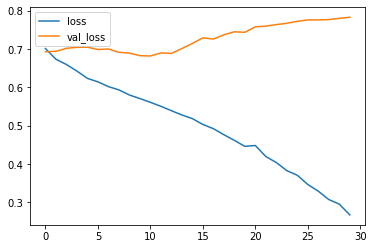

In [96]:
# 劃出 model.fit() training 和 validating 的 loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

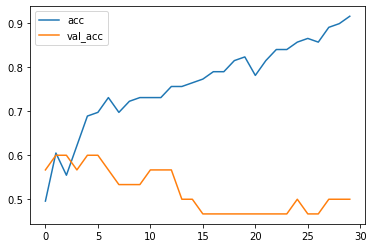

In [97]:
# 劃出準確性 accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# 以淨利率來看

In [206]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2)
N, D = X_train.shape
print ("N:", N, "D:", D)

N: 212 D: 6


In [207]:
# 建立TF模型 for 淨利
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#編譯模型
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [208]:
# 訓練模型
r1 = model1.fit(X_train, y1_train, validation_data=(X_test, y1_test), epochs=100)


# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model1.evaluate(X_train, y1_train))
print("Test score:", model1.evaluate(X_test, y1_test))

Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 2.1915 - accuracy: 0.5472 - val_loss: 1.6193 - val_accuracy: 0.4444
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4916 - accuracy: 0.5896 - val_loss: 1.0590 - val_accuracy: 0.5741
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0829 - accuracy: 0.5755 - val_loss: 1.0398 - val_accuracy: 0.5185
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8738 - accuracy: 0.6462 - val_loss: 0.9477 - val_accuracy: 0.6481
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8227 - accuracy: 0.5896 - val_loss: 0.9137 - val_accuracy: 0.7037
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7715 - accuracy: 0.6557 - val_loss: 0.9556 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7366 - accuracy: 0.6509 - val_loss: 0.8355 - val_accuracy: 0.6296
Epoch 8/100
7/7 [=========

<h2>loss: 0.3904 - accuracy: 0.8396 | val_loss: 0.5109 - val_accuracy: 0.7407

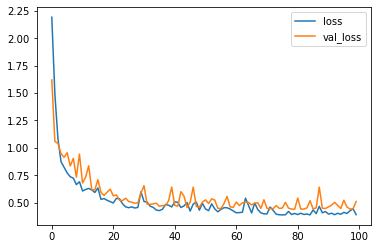

In [209]:
# 劃出 model.fit() training 和 validating 的 loss
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='loss')
plt.plot(r1.history['val_loss'], label='val_loss')
plt.legend()

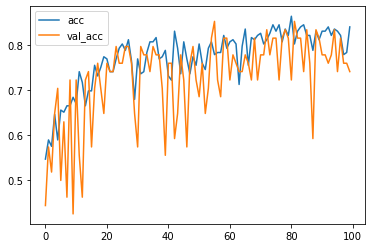

In [210]:
# 劃出準確性 accuracy 
plt.plot(r1.history['accuracy'], label='acc')
plt.plot(r1.history['val_accuracy'], label='val_acc')
plt.legend()

<h1>加入 運費指標 (BDI 與 航空燃油) 

以毛利率為應變數

In [90]:
#建立與 MySQL 的連結
class mysql_engine1():
 user='root'
 passwd='ian1991'
 host='localhost'
 port = '3306'
 db_name='tfb103d_project'
 engine = create_engine('mysql+pymysql://{0}:{1}@{2}:{3}/{4}?charset=utf8'.format(user,passwd,host,port,db_name))

#設定讀取 MySQL 中的資料表並轉為 DataFrame 的功能
def get_data1(sql):
 pg_enine=mysql_engine1()
 try:
  with pg_enine.engine.connect() as con, con.begin():
   df=pd.read_sql(sql,con)# 獲取資料
  con.close()
 except:
  df=None
 return df

In [91]:
env_factor = get_data1("""SELECT * FROM env_factor_new;""")
env_factor.head(10)

,data_date,BDI,BCI,BPI,N1NG,avgas_cpc,avgas_fpg,Dubai,WTI_future,WTI_now,...,people_fully_vaccinated_per_hundred_USA,people_fully_vaccinated_per_hundred_OWID_EUR,people_fully_vaccinated_per_hundred_GBR,people_fully_vaccinated_per_hundred_FRA,people_fully_vaccinated_per_hundred_JPN,people_fully_vaccinated_per_hundred_CHN,people_fully_vaccinated_per_hundred_TWN,people_fully_vaccinated_per_hundred_OWID_WRL,people_fully_vaccinated_per_hundred_HKG,people_fully_vaccinated_per_hundred_SGP
0,20182,1818.56,2880.00,1828.22,3.94,0.65,0.65,78.83,75.69,75.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20183,1609.62,2865.92,1524.85,2.89,0.60,0.60,73.92,69.47,69.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20184,1340.21,1960.14,1528.79,3.71,0.62,0.62,64.96,57.40,57.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20191,799.00,950.23,879.00,2.85,0.51,0.52,63.88,55.19,55.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20192,1010.15,1360.31,1195.62,2.48,0.56,0.56,67.03,59.65,59.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20193,2049.54,3899.77,2027.46,2.32,0.53,0.53,60.61,56.10,55.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20194,1486.21,2687.36,1407.57,2.40,0.53,0.53,62.06,57.47,57.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20201,598.46,694.00,798.31,1.82,0.51,0.50,50.59,46.46,45.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20202,777.92,1125.31,818.85,1.74,0.24,0.24,33.59,29.42,29.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20203,1518.31,2529.46,1459.23,2.18,0.32,0.32,42.55,40.76,40.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
dF = financial_statements[['stock_report_date','net_profit_rate','operating_gross_rate','current_rate', 'quick_rate', 'debt_rate', 'receivables_turnover_rate', 'inventory_turnover_rate', 'cash_reinvest_rate']]
dE = env_factor[['data_date','BDI','avgas_cpc']]
data_add1 = pd.merge(dF,dE,left_on="stock_report_date",right_on='data_date',how="inner")
data_add1['operating_gross_rate1'] = data_add1.apply(lambda r : operating_gross(r['operating_gross_rate']), axis = 1)
data_add1['net_profit_rate1'] = data_add1.apply(lambda r : net_profit(r['net_profit_rate']), axis = 1)
data_add1

,stock_report_date,net_profit_rate,operating_gross_rate,current_rate,quick_rate,debt_rate,receivables_turnover_rate,inventory_turnover_rate,cash_reinvest_rate,data_date,BDI,avgas_cpc,operating_gross_rate1,net_profit_rate1
0,20182,6.22,17.18,231.67,176.63,44.66,3.18,3.62,7.16,20182,1818.56,0.65,0,1
1,20182,30.99,47.84,207.14,181.49,27.41,4.57,2.83,18.27,20182,1818.56,0.65,1,1
2,20182,8.98,44.47,145.73,127.56,61.57,3.89,2.15,20.98,20182,1818.56,0.65,1,1
3,20182,12.40,38.21,157.07,134.48,41.24,4.51,2.14,2.84,20182,1818.56,0.65,1,1
4,20182,11.93,30.21,218.00,184.61,40.31,2.11,3.10,16.11,20182,1818.56,0.65,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,20212,25.72,47.64,299.34,240.74,22.94,5.75,3.00,12.62,20212,2749.08,0.48,1,1
152,20212,25.62,40.89,157.84,137.14,45.22,3.17,3.49,27.84,20212,2749.08,0.48,1,1
153,20212,23.58,34.04,194.94,157.62,66.04,3.62,2.77,6.35,20212,2749.08,0.48,0,1
154,20212,20.69,32.80,126.11,108.37,29.88,2.51,6.26,8.63,20212,2749.08,0.48,0,1


In [213]:
data_add1.isnull().sum()

stock_report_date             0
net_profit_rate               0
operating_gross_rate          0
current_rate                  0
quick_rate                    0
debt_rate                     0
receivables_turnover_rate     0
inventory_turnover_rate      13
cash_reinvest_rate            0
data_date                     0
BDI                           0
avgas_cpc                     0
operating_gross_rate1         0
net_profit_rate1              0
dtype: int64

In [214]:
data_add_nona = data_add1.copy()
data_add_nona.fillna(0, inplace = True)

In [215]:
data_add_nona.isnull().sum()

stock_report_date            0
net_profit_rate              0
operating_gross_rate         0
current_rate                 0
quick_rate                   0
debt_rate                    0
receivables_turnover_rate    0
inventory_turnover_rate      0
cash_reinvest_rate           0
data_date                    0
BDI                          0
avgas_cpc                    0
operating_gross_rate1        0
net_profit_rate1             0
dtype: int64

In [216]:
X_1 = data_add_nona[['current_rate', 'quick_rate', 'debt_rate', 'receivables_turnover_rate', 'inventory_turnover_rate', 'cash_reinvest_rate','BDI',"avgas_cpc"]]
y_1 = data_add_nona['operating_gross_rate1']
y_2= data_add_nona['operating_gross_rate1']

In [217]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2)
N, D = X_1_train.shape
print ("N:", N, "D:", D)
X_1_train

N: 124 D: 8


,current_rate,quick_rate,debt_rate,receivables_turnover_rate,inventory_turnover_rate,cash_reinvest_rate,BDI,avgas_cpc
69,186.72,155.68,56.88,5.07,4.60,15.97,2049.54,0.53
81,182.91,150.97,55.55,7.13,6.05,21.55,1486.21,0.53
85,136.13,120.11,28.43,2.17,1.86,7.88,598.46,0.51
60,232.48,158.92,45.18,4.50,4.82,3.44,2049.54,0.53
109,175.04,153.86,32.15,6.47,4.80,18.03,1518.31,0.32
...,...,...,...,...,...,...,...,...
136,249.26,204.52,33.23,1.79,1.66,10.67,1742.92,0.42
8,237.07,208.83,32.30,2.93,3.09,11.99,1818.56,0.65
110,136.84,120.69,66.22,4.37,4.16,32.70,1518.31,0.32
83,191.35,159.21,53.33,6.69,5.08,9.34,1486.21,0.53


In [218]:
scaler_1 = StandardScaler()
X_1_train = scaler_1.fit_transform(X_1_train)
X_1_test = scaler_1.transform(X_1_test)
X_1_train

array([[-4.76138915e-01, -4.27063826e-01,  1.29426893e+00,
         1.02024307e-01,  4.94254221e-01,  5.93096292e-01,
         9.87176009e-01,  3.86024613e-01],
       [-5.17668653e-01, -4.81532608e-01,  1.20192953e+00,
         8.57856350e-01,  1.10963341e+00,  1.24420643e+00,
         9.36876481e-05,  3.86024613e-01],
       [-1.02757971e+00, -8.38412992e-01, -6.80961074e-01,
        -9.62011095e-01, -6.68600250e-01, -3.50896721e-01,
        -1.55544628e+00,  2.22096353e-01],
       [ 2.26539426e-02, -3.89594855e-01,  4.81959927e-01,
        -1.07113686e-01,  5.87622099e-01, -8.68984357e-01,
         9.87176009e-01,  3.86024613e-01],
       [-6.03453176e-01, -4.48111211e-01, -4.22688470e-01,
         6.15696569e-01,  5.79134110e-01,  8.33470285e-01,
         5.63401906e-02, -1.33522212e+00],
       [ 5.65535446e-02,  4.30443643e-01, -3.47011820e-01,
         6.12027482e-01, -1.45798321e+00,  2.69874951e-01,
         5.82446499e-01,  1.36959418e+00],
       [-7.90936506e-01, -6.414696

In [219]:
# 建立TF模型
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [220]:
#編譯模型
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [221]:
# 訓練模型
r_1 = model_1.fit(X_1_train, y_1_train, validation_data=(X_1_test, y_1_test), epochs=100)


# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model_1.evaluate(X_1_train, y_1_train))
print("Test score:", model_1.evaluate(X_1_test, y_1_test))

Epoch 1/100
4/4 [==============================] - 0s 35ms/step - loss: 0.7580 - accuracy: 0.3952 - val_loss: 0.7684 - val_accuracy: 0.3438
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7301 - accuracy: 0.4435 - val_loss: 0.7459 - val_accuracy: 0.3750
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7103 - accuracy: 0.5161 - val_loss: 0.7249 - val_accuracy: 0.3438
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5565 - val_loss: 0.7058 - val_accuracy: 0.4375
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6712 - accuracy: 0.5726 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6548 - accuracy: 0.6048 - val_loss: 0.6742 - val_accuracy: 0.5312
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6408 - accuracy: 0.6210 - val_loss: 0.6611 - val_accuracy: 0.5312
Epoch 8/100
4/4 [=========

 <h2>以財務數據預測結果 : loss: 0.3893 - accuracy: 0.8396 | val_loss: 0.5325 - val_accuracy: 0.7963
 
 加入運費因素預測結果:loss: 0.3864 - accuracy: 0.8629  | val_loss: 0.4951 - val_accuracy: 0.7500

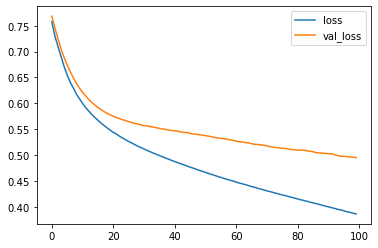

In [222]:
# 劃出 model.fit() training 和 validating 的 loss
plt.plot(r_1.history['loss'], label='loss')
plt.plot(r_1.history['val_loss'], label='val_loss')
plt.legend()

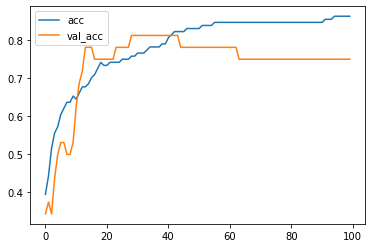

In [223]:
# 劃出準確性 accuracy 
plt.plot(r_1.history['accuracy'], label='acc')
plt.plot(r_1.history['val_accuracy'], label='val_acc')
plt.legend()

以 淨利率 為應變數

In [227]:
X_1_train, X_1_test, y_2_train, y_2_test = train_test_split(X_1, y_2, test_size=0.2)
N, D = X_1_train.shape
print ("N:", N, "D:", D)
X_1_train

N: 124 D: 8


,current_rate,quick_rate,debt_rate,receivables_turnover_rate,inventory_turnover_rate,cash_reinvest_rate,BDI,avgas_cpc
139,451.82,368.15,17.26,2.71,1.43,0.15,1742.92,0.42
42,461.70,448.03,16.94,3.00,0.00,12.07,799.00,0.51
97,139.89,123.16,29.71,4.29,3.51,13.29,777.92,0.24
104,152.43,132.56,40.58,3.03,3.64,18.59,777.92,0.24
43,457.91,381.47,17.47,1.92,1.53,2.91,799.00,0.51
...,...,...,...,...,...,...,...,...
118,232.31,204.38,22.35,3.59,9.85,-2.51,1518.31,0.32
108,276.37,216.12,40.01,4.99,4.64,12.91,1518.31,0.32
93,132.82,108.57,61.17,1.73,1.40,3.96,598.46,0.51
155,214.54,170.61,65.40,3.55,2.71,6.93,2749.08,0.48


In [225]:
# 建立TF模型
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#編譯模型
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [228]:
# 訓練模型
r_2 = model_2.fit(X_1_train, y_2_train, validation_data=(X_1_test, y_2_test), epochs=100)


# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model_1.evaluate(X_1_train, y_2_train))
print("Test score:", model_1.evaluate(X_1_test, y_2_test))

Epoch 1/100
4/4 [==============================] - 0s 36ms/step - loss: 55.7469 - accuracy: 0.6290 - val_loss: 30.9558 - val_accuracy: 0.6875
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 33.4161 - accuracy: 0.6210 - val_loss: 13.8540 - val_accuracy: 0.6875
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 17.0554 - accuracy: 0.5000 - val_loss: 11.5695 - val_accuracy: 0.4062
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 14.2197 - accuracy: 0.4194 - val_loss: 15.3510 - val_accuracy: 0.4062
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 13.5201 - accuracy: 0.4355 - val_loss: 7.9173 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 9.7949 - accuracy: 0.4839 - val_loss: 5.9887 - val_accuracy: 0.5312
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 8.5510 - accuracy: 0.5484 - val_loss: 4.9094 - val_accuracy: 0.5938
Epoch 8/100
4/4 [

<h2>財務數據預測:loss: 0.3904 -  accuracy: 0.8396 | val_loss: 0.5109 -  val_accuracy: 0.7407
    加入運費因素:loss: 0.5566 -  accuracy: 0.6774  |  val_loss: 0.8752 -  val_accuracy: 0.6875

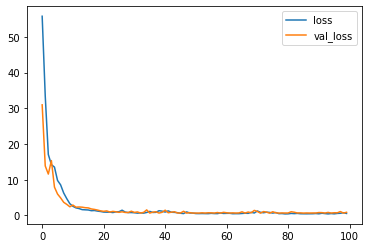

In [229]:
# 劃出 model.fit() training 和 validating 的 loss
plt.plot(r_2.history['loss'], label='loss')
plt.plot(r_2.history['val_loss'], label='val_loss')
plt.legend()

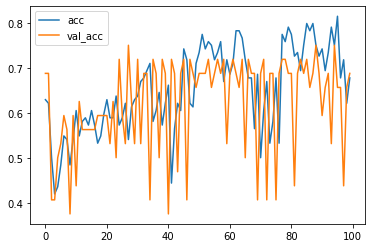

In [230]:
# 劃出準確性 accuracy 
plt.plot(r_2.history['accuracy'], label='acc')
plt.plot(r_2.history['val_accuracy'], label='val_acc')
plt.legend()